ШЛЯХТИНА ЛЮДМИЛА

1. Частотность и фонетика
(первая часть домашнего задания строится на тех же данных, что были в предыдущем домашнем задании)

Во многих лингвистических исследованиях отмечается, что часто используемые в языке слова звучат короче, а при их произнесении наблюдается редукция и коартикуляция. Работа Fabian Tomaschek et al. (2018) исследует гипотезу, что моторные навыки произнесения улучшаются с опытом, который, в свою очередь, напрямую связан с частотностью слова. Ученые попросили испытуемых (17 бакалавров университета Тюбингена, 8 мужчин и 9 женщин) прочитать вслух немецкие глаголы, содержащие звук [a:] в основе. Испытуемые были поставлены в экспериментальные условия, которые исподволь заставляли их читать быстрее или медленнее (slow/fast condition).

В этом задании мы просим вас сравнить длину звучания всего слова целиком, а также длину звучания интересующего ученых сегмента (звука [a:]) в условиях slow и fast. Хотя логично предположить, что в условии fast произнесение и слов, и сегментов будет короче, все же нужно убедиться, что данные это подтверждают, прежде чем переходить к более сложному анализу по сути вопроса. Кроме того, мы будем уверены, что экспериментальные условия были должным образом соблюдены, ученые не запутались в кодировании данных и документировали результаты корректно.

Интересующие нас переменные:

LogDurationW - log-transformed word duration (логарифм длины произнесения слова)
LogDurationA - log-transformed segment duration (логарифм длины произнесения сегмента)
Cond - condition: slow vs. fast (условие).

1.0 Загрузка данных
Загрузим пакет tidyverse, а данные загрузим в переменную dur_word_freq.

In [1]:
library(tidyverse)
dur_word_freq <- read_csv("https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/dur_word_frequency.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 832 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lemma, Participant, Cond, Exponent
dbl (4): ...1, LogDurationA, LogDurationW, Frequency

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


1.1 Исследуем набор данных
Выведите все уникальные значения, которые встречаются в столбце Lemma, с помощью функции distinct(), см. фрагмент ниже:

In [2]:
dur_word_freq %>%
  distinct(`Lemma`)

Lemma
<chr>
schab
blas
schlaf
lahm
fahnd
mahn
bahn
schad
wat


1.2 Пропущенные значения
Давайте убедимся, что наши данные не содержат значений NA (а если содержат, то хорошо бы знать, в каких столбцах). Используйте функции map_int() и is.na(), чтобы сделать выдачу, которая позволит исследовать вопрос.

In [3]:
na <- map_int(dur_word_freq, ~ sum(is.na(.x)))
na # Судя по выводу, пропущенных данных в датасете нет.

...1 LogDurationA LogDurationW        Lemma  Participant         Cond 
           0            0            0            0            0            0 
    Exponent    Frequency 
           0            0

1.3 Данные как факторы
Факторы - это строковые переменные, закодированные числами (как levels) для экономии вычислительных ресурсов. Некоторые функции в R работают только с факторами, а некоторые методы чувствительны к порядку кодирования, поэтому перевод из строк в факторы иногда бывает полезен. Используя функции mutate() и across(), переведите все строковые переменные в столбцах в факторы, а затем посмотрите на структуру тиббла с помощью функции str().

In [4]:
tib <- dur_word_freq %>%
  mutate(across(where(is.character), as.factor))
str(tib)

tibble [832 × 8] (S3: tbl_df/tbl/data.frame)
 $ ...1        : num [1:832] 11431 1 136 71 11581 ...
 $ LogDurationA: num [1:832] -1.32 -1.36 -1.5 -1.28 -1.33 ...
 $ LogDurationW: num [1:832] -0.477 -0.36 -0.27 -0.377 -0.447 ...
 $ Lemma       : Factor w/ 17 levels "bad","bahn","blas",..: 9 3 11 6 6 4 8 2 10 15 ...
 $ Participant : Factor w/ 17 levels "Art_02_S01","Art_02_S03",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Cond        : Factor w/ 2 levels "fast","slow": 2 2 2 2 2 2 2 2 2 2 ...
 $ Exponent    : Factor w/ 3 levels "en","n","t": 3 2 1 1 3 1 1 3 2 2 ...
 $ Frequency   : num [1:832] -6.98 -5.74 -4.68 -6.26 -6.47 ...


1.4 Кодирование факторов
Догадайтесь, вспомните или прочитайте, по какому принципу кодируются факторы по умолчанию (подсказка: в переменной Cond значение fast имеет уровень 1, а slow имеет уровень 2).

In [5]:
# Думаю, что факторы кодируются в алфавитном порядке (F идёт до S), а нумерация в R начинается с единицы, а не с нуля.

1.5 Усредненные длительности сегмента и слова
Сгруппировав данные по условию (Cond), выведите средние значения лог-трансформированных длин сегмента и слова примерно в таком виде (названия столбцов должны совпадать с данными в примере, округление числовых переменных может отличаться):

In [6]:
summary <- dur_word_freq %>%
  group_by(Cond) %>%
  summarise(
    meanLogDurA = round(mean(LogDurationA, na.rm = TRUE), 6),
    meanLogDurW = round(mean(LogDurationW, na.rm = TRUE), 6)
  )
summary

Cond,meanLogDurA,meanLogDurW
<chr>,<dbl>,<dbl>
fast,-1.738072,-0.583625
slow,-1.628756,-0.448305


1.6 Больше описательных статистик для длительности сегмента и слова
Добавьте в таблицу 1.4 минимальные, максимальные и медианные значения для групп fast и slow (названия столбцов могут быть другими, чем в 1.4). Вам могут быть полезны функции min(), max() и median().

In [7]:
summary_2 <- dur_word_freq %>%
  group_by(Cond) %>%
  summarise(
    meanLogDurA = round(mean(LogDurationA), 6),
    meanLogDurW = round(mean(LogDurationW), 6),
    minLogDurA = round(min(LogDurationA), 6),
    minLogDurW = round(min(LogDurationW), 6),
    maxLogDurA = round(max(LogDurationA), 6),
    maxLogDurW = round(max(LogDurationW), 6),
    medianLogDurA = round(median(LogDurationA), 6),
    medianLogDurW = round(median(LogDurationW), 6)
  )
summary_2

Cond,meanLogDurA,meanLogDurW,minLogDurA,minLogDurW,maxLogDurA,maxLogDurW,medianLogDurA,medianLogDurW
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fast,-1.738072,-0.583625,-2.571097,-1.171151,-1.231057,-0.021402,-1.720362,-0.597819
slow,-1.628756,-0.448305,-3.506558,-1.237840,-1.096722,0.578653,-1.638736,-0.446271


1.7 Длинный и короткий формат
Данные в наборе, с которым мы работаем, следуют “длинному” формату - каждой точке наблюдения соответствует своя строка. Отфильтруйте данные по условию “slow” и по значению “t” переменной Exponent (окончание глагольной формы), затем представьте их в широком формате таким образом, чтобы каждая строка представляла длительность произнесения разных слов одним испытуемым (см. фрагмент ниже).

In [24]:
filtered <- dur_word_freq %>%
  filter(Cond == "slow" & Exponent == "t")

In [25]:
wide <- filtered %>%
  pivot_wider(
    names_from = Lemma,
    values_from = LogDurationW,
    id_cols = Participant
  )
wide

Participant,schab,lahm,bahn,zahn,latsch,zahl,blas,mahn,schlaf
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Art_02_S01,-0.4768593,-0.4471271,-0.4085488,-0.4620196,-0.2231311,-0.5108090,-0.4155003,-0.5798006,-0.4307675
Art_02_S03,-0.4780197,-0.5621014,-0.5621014,-0.6161676,-0.6931272,-0.5276158,-0.5276158,-0.6161676,-1.2378399
Art_02_S04,-0.5798006,-0.7550013,-0.7133295,-0.5798006,-0.6161676,-0.5978188,-0.5447099,-0.7133295,-0.5447099
Art_02_S05,-0.6539072,-0.7126705,-0.4780197,-0.6348594,-0.2662896,-0.4307675,-0.6539072,-0.7339483,-0.7339483
Art_02_S08,-0.4620196,-0.6733249,-0.6161676,-0.3010916,-0.4942799,-0.4155003,-0.3566607,-0.5978188,-0.2484485
Art_02_S09,-0.5447099,-0.8915737,-0.4004626,-0.4462715,-0.6348594,-0.7765071,-0.4462715,-0.9415829,-0.3146970
Art_02_S10,-0.5276158,-0.6931272,-0.5621014,-0.6931272,-0.6161676,-0.6161676,-0.5108090,-0.5276158,-0.5108090
Art_02_S12,-0.7550013,-0.5108090,-0.5108090,-0.3566607,-0.5276158,-0.5798006,-0.6348594,-0.5798006,-0.2231311
Art_02_S15,-0.4004626,-0.5447099,-0.5447099,-0.4462715,-0.5447099,-0.6733249,-0.4462715,-0.7133295,-0.4620196


1.8
Найдите глагол, для которого в заданных экспериментальных условиях нет данных минимум по двум испытуемым.

schlaf

1.9
Ваш код для этого задания:

In [32]:
wide %>%
  summarise(across(everything(), ~ sum(is.na(.)))) # Видно, что только у глагола schlaf нашлось два NA.

Participant,schab,lahm,bahn,zahn,latsch,zahl,blas,mahn,schlaf
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,1,1,0,0,2


1.10
Сколько примерно времени вы потратили на выполнение первой части домашнего задания? (Округлите до получаса, считая чистое время без отвлечения на другие дела).

In [17]:
# 4-5 часов

2. Лингвистические интересы студентов
(предыдущая часть домашнего задания позволяет получить максимум 7 баллов. Сделав это задание, вы сможете повысить оценку).

В файле по ссылке ниже приведены ответы студентов в опроснике по курсу.

ID – id студента (данные анонимизированы)
Topics – ответ студента на вопрос, какие области теоретической лингвистики его интересуют.
Гугл-форма превращает несколько выбранных ответов в строку, где темы разделены запятой. В датасете данные представлены в таком виде: "грамматика и семантика", "социолингвистика".

In [18]:
topics <- read_tsv("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/students2025_topics.tsv")

Rows: 21 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Topics
dbl (1): ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


2.1
Используя функцию separate_rows(), представьте данные примерно в таком виде (порядок столбцов может быть любым):

In [19]:
topics_2 <- topics %>%
  separate_rows(Topics, sep = ", ") %>%
  mutate(value = TRUE) %>%
  pivot_wider(names_from = Topics, values_from = value, values_fill = FALSE)
topics_2

ID,фонетика и интонация,история языка,компаративистика,филогенетика,экспериментальная лингвистика,анализ данных в гуманитарных науках,грамматика и семантика,социолингвистика,NA,корпусная лингвистика,лингвогеография
<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
3,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
9,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE


2.2
Добавьте в код еще одну строку, чтобы с помощью функций summarise, across и where получить тиббл, в котором подсчитано количество значений TRUE по каждому столбцу. Пример:

In [20]:
topics_3 <- topics_2 %>%
  summarise(across(where(is.logical), sum))
topics_3

фонетика и интонация,история языка,компаративистика,филогенетика,экспериментальная лингвистика,анализ данных в гуманитарных науках,грамматика и семантика,социолингвистика,NA,корпусная лингвистика,лингвогеография
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
7,4,4,4,15,8,9,10,1,1,1


2.3 Визуализация
С помощью ggplot2 визуализируйте полученные частоты упоминаний областей лингвистики в виде столбчатой диаграммы: Во-первых, решим проблему того, что ggplot не сможет легко извлечь данные, записанные в отдельных столбцах. Код ниже показывает, как с помощью pivot_longer() можно транспонировать их в такой формат, чтобы ggplot мог пользоваться векторами, заданными в двух столбцах - названиями областей в одном topics и счетчиком в другом (counts). (Здесь полученные ранее данные сохранены в переменную topic_counts). Во-вторых, отфильтруйте строку, в которой встретилась тема “NA” - дело в том, что один из студентов не захотел отвечать на этот вопрос.

Теперь используйте геом geom_col c заливкой столбцов цветом #77b6ff и классической темой, чтобы получить столбчатую диаграмму. Обратите внимание, что нужно горизонтально расположить столбцы для лучшей читаемости длинных подписей.

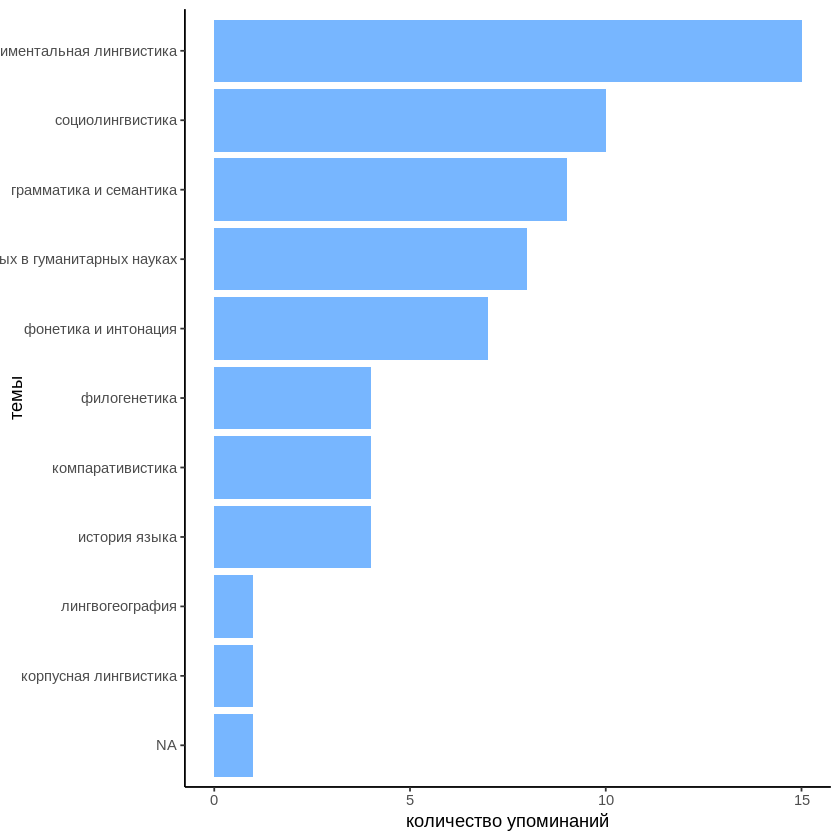

In [21]:
topics_long <- topics_3 %>%
  pivot_longer(cols = everything(), names_to = "topics", values_to = "counts")%>%
  filter(!is.na(topics) & !is.na(counts))

ggplot(topics_long, aes(x = reorder(topics, counts), y = counts)) +
  geom_col(fill = "#77b6ff") +
  coord_flip() +
  labs(x = "темы",
       y = "количество упоминаний") +
  theme_classic()

3.1 Адрес репозитория на github
Вы можете выкладывать задания, которые делаете самостоятельно на семинаре, в репозиторий на гитхабе. Если вы хотите получать фидбек, укажите адрес этого репозитория ниже:

In [22]:
# https://github.com/luchia0602/R

3.2
Это необязательно, но вы можете написать здесь свои комментарии по домашнему заданию, если хотите.

In [ ]:
# В файле с домашним заданием в пункте 2.1 ошибка: в столбце "Компаративистика" у участника 2 должен быть FALSE, а не TRUE.